In [21]:
import os
import sys
import glob
import scipy
import matplotlib
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from shutil import copyfile
import scipy.stats

from tqdm import tqdm

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_columns', 100)

sys.path.append('/home/mattolm/Bio_scripts/')

import shutil
from IPython.display import display, HTML

from Bio import SeqIO

https://github.com/alexcritschristoph/wastewater_sarscov2

# LINKS TO DATA

In [22]:
INTRAPATIENT_SNVS_SAVE_LOCATION = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Interpatient_SNVs_v2.csv.gz'
INTRAPATIENT_SNVS_SNPLEVEL_SAVE_LOCATION ='/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Interpatient_SNVs_SNPlevel_v2.csv.gz'

WASTEWATER_SNVS_SAVELOC = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Wastewater_SNVs_v2.csv'
WASTEWATER_ABUND_SAVELOC = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Wastewater_abundance_v2.csv'

WASTEWATER_METADATA = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/data/wastewater/sample_metadata.txt'

In [23]:
fig_loc = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/figures/raw_figures'

# Load wastewater SNVs

In [24]:
WSdb = pd.read_csv(WASTEWATER_SNVS_SAVELOC)
for c in ['key']:
    WSdb[c] = [eval(x) for x in WSdb[c]]
    
Adb = pd.read_csv(WASTEWATER_ABUND_SAVELOC)
WSdb['coverage'] = WSdb['sample'].map(Adb.set_index('sample')['coverage'].to_dict())
    
WSdb

,scaffold,position,refBase,A,C,T,G,conBase,varBase,allele_count,cryptic,baseCoverage,varFreq,conFreq,refFreq,sample,key,key_freq,coverage
0,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,33,A,6,0,2,0,A,T,2,False,8,0.250000,0.750000,0.750000,6_30_S_MOS,"(33, T)",0.250000,33.796247
1,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,34,A,5,0,2,0,A,T,2,False,7,0.285714,0.714286,0.714286,6_30_S_MOS,"(34, T)",0.285714,33.796247
2,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,35,C,0,7,2,0,C,T,2,False,9,0.222222,0.777778,0.777778,6_30_S_MOS,"(35, T)",0.222222,33.796247
3,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,240,C,0,1,31,0,T,C,1,False,32,0.031250,0.968750,0.031250,6_30_S_MOS,"(240, T)",0.968750,33.796247
4,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,1025,C,0,24,2,0,C,T,2,False,26,0.076923,0.923077,0.923077,6_30_S_MOS,"(1025, T)",0.076923,33.796247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28377,G,0,0,8,20,G,T,2,False,28,0.285714,0.714286,0.714286,6_09_S,"(28377, T)",0.285714,7.075737
332,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28880,G,18,0,0,7,A,G,2,False,25,0.280000,0.720000,0.280000,6_09_S,"(28880, A)",0.720000,7.075737
333,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28881,G,18,0,0,7,A,G,2,False,25,0.280000,0.720000,0.280000,6_09_S,"(28881, A)",0.720000,7.075737
334,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28882,G,0,18,0,7,C,G,2,False,25,0.280000,0.720000,0.280000,6_09_S,"(28882, C)",0.720000,7.075737


# Load interpatient SNVs

In [25]:
ISdb = pd.read_csv(INTRAPATIENT_SNVS_SAVE_LOCATION)
for c in ['SNP_IDs']:
    ISdb[c] = [eval(x) for x in ISdb[c]]


IVdb = pd.read_csv(INTRAPATIENT_SNVS_SNPLEVEL_SAVE_LOCATION)
for c in ['SNP', 'strains']:
    IVdb[c] = [eval(x) for x in IVdb[c]]
IVdb['key'] = [(s[0], s[2]) for s in IVdb['SNP']]

## Load intrapatient SNVs

In [26]:
pass

## Load metadata

In [27]:
Mdb = pd.read_csv(WASTEWATER_METADATA, sep='\t')
Mdb['name'] = ["{0} {1}".format(l, d) for l, d in zip(Mdb['location'], Mdb['date'])]
Mdb['name'].iloc[1] = 'Oakland 5-19 (2)'
Mdb['name'].iloc[5] = 'Oakland 6-30 (2)'
Mdb

,sample,location,date,name
0,5_19_S_2,Oakland,5-19,Oakland 5-19
1,5_19_S,Oakland,5-19,Oakland 5-19 (2)
2,5_28_S,Oakland,5-28,Oakland 5-28
3,6_09_S,Oakland,6-09,Oakland 6-09
4,6_30_S_COL,Oakland,6-30,Oakland 6-30
5,6_30_S_MOS,Oakland,6-30,Oakland 6-30 (2)
6,MR_7_1_MOS,Marin,7-1,Marin 7-1
7,SQ_7_1_MOS,SanQuentin,7-1,SanQuentin 7-1


## Figure 2a - SNV classification overview

In [28]:
Inter_SNVS = set(IVdb['key'].tolist())
WSdb['Inter_present'] = [x in Inter_SNVS for x in WSdb['key']]
WSdb['times_detected'] = WSdb['key'].map(WSdb['key'].value_counts().to_dict())

# Text description of unique SNVs
xdb = WSdb.sort_values('key').drop_duplicates(subset=['key'])
t2v = xdb['Inter_present'].value_counts()
total = len(xdb)
print("There are {0} SNVs in wastewater; {1} ({2:.1f}%) are also found interpatient".format(total, t2v[True], (t2v[True]/total) *100))

There are 225 SNVs in wastewater; 126 (56.0%) are also found interpatient


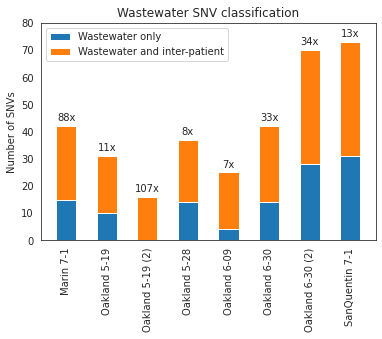

In [29]:
# Figure
table = defaultdict(list)
for sample, db in WSdb.groupby('sample'):
    table['sample'].append(sample)
    table['SNVs'].append(len(db))
    table['InterPatient_SNVs'].append(len(db[db['Inter_present'] == True]))
    table['Recurrent_SNVs'].append(len(db[db['times_detected'] > 1]))
    
# db = WSdb.sort_values('key').drop_duplicates(subset=['key'])
# table['sample'].append('All')
# table['SNVs'].append(len(db))
# table['InterPatient_SNVs'].append(len(db[db['Inter_present'] == True]))
# table['Recurrent_SNVs'].append(len(db[db['times_detected'] > 1]))
    
fdb = pd.DataFrame(table)

fdb['name'] = fdb['sample'].map(Mdb.set_index('sample')['name'].to_dict())
fdb['coverage'] = fdb['sample'].map(Adb.set_index('sample')['coverage'].to_dict())

fdb = fdb.sort_values('name')

N = len(fdb)
uniq = [s-i for s, i in zip(fdb['SNVs'], fdb['InterPatient_SNVs'])]
inter = [i for s, i in zip(fdb['SNVs'], fdb['InterPatient_SNVs'])]
totals = [s for s, i in zip(fdb['SNVs'], fdb['InterPatient_SNVs'])]
covs = fdb['coverage'].tolist()
names = fdb['name'].tolist()
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

sns.set_style('white')

fig, ax = plt.subplots()
p1 = ax.bar(ind, uniq, width)
p2 = ax.bar(ind, inter, width,
             bottom=uniq)

# p1 = plt.bar(ind, uniq, width)
# p2 = plt.bar(ind, inter, width,
#              bottom=uniq)

for i, rect in enumerate(p2):
    ax.annotate('{0:.0f}x'.format(covs[i]),
               xy=(rect.get_x() + rect.get_width() / 2, totals[i]),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


plt.ylabel('Number of SNVs')
plt.title('Wastewater SNV classification')
plt.xticks(ind, names, rotation=90)
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Wastewater only', 'Wastewater and inter-patient'))

plt.gcf().savefig(fig_loc + 'Figure2a_v1.pdf', bbox_inches='tight')
plt.show()


## Figure 2b - Regional localization

In [30]:
GENOME_LENGTH = 29902

import itertools

# Calculate state-level p-values
table = defaultdict(list)
for sample, sdb in itertools.chain(WSdb.groupby('sample'), zip(['all'], [WSdb])):
    
    # Get the SNPs in this sample
    sample_snps = set(sdb.key.value_counts()[sdb.key.value_counts() > 0].index)
    
    # Iterate through states
    for div, CAdb in ISdb[ISdb['country'] == 'USA'].groupby('division'):
        
        # Get the SNPs from this state
        state_snps = set((x[0], x[2]) for x in set.union(*CAdb['SNP_IDs'].tolist()) if x[2] != 'NA')
        
        # M = total number of sites
        # n = number of SNPs in CA
        # N = number of SNPs we see in wastewater
        [M, n, N] = [GENOME_LENGTH, len(state_snps), len(sample_snps)]
        
        # calculate the hypergeom distribution with those parameters
        rv = scipy.stats.hypergeom(M, n, N)
        
        # Calculate chance of seeing as many snps as we did
        p = rv.pmf(len(sample_snps.intersection(state_snps)))
            
        table['sample'].append(sample)
        table['division'].append(div)
        table['division_samples'].append(len(CAdb))
        table['percent_ww_in_division'].append(len(sample_snps.intersection(state_snps)) / len(sample_snps))
        table['num_sample_SNVs'].append(len(sample_snps))
        table['num_div_SNVs'].append(len(state_snps))
        table['p_value'].append(p)
                   
Ddb = pd.DataFrame(table)
Ddb.sort_values('p_value').head()

,sample,division,division_samples,percent_ww_in_division,num_sample_SNVs,num_div_SNVs,p_value
351,MR_7_1_MOS,South Carolina,74,0.500000,42,129,1.931760e-39
299,6_30_S_MOS,South Carolina,74,0.285714,70,129,1.431421e-31
455,all,South Carolina,74,0.111111,225,129,3.195431e-28
89,5_19_S_2,Puerto Rico,3,0.322581,31,24,5.477590e-25
342,MR_7_1_MOS,New Mexico,171,0.380952,42,200,1.233427e-24


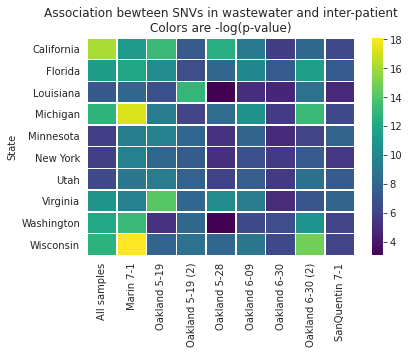

In [31]:
fdb = Ddb.copy()
fdb['name'] = fdb['sample'].map(Mdb.set_index('sample')['name'].to_dict())
fdb['name'].fillna('All samples', inplace=True)
fdb = fdb[fdb['division_samples'] > 500]
fdb['log_p'] = np.log10(fdb['p_value']) * -1

vmin = -20
vmax = 0

db = pd.pivot_table(data=fdb, index='division',
                                values='log_p',
                                columns='name')

sns.heatmap(db, linewidths=.5, cmap='viridis')
plt.xlabel('')
plt.ylabel('State')
plt.title("Association bewteen SNVs in wastewater and inter-patient\nColors are -log(p-value)")

plt.gcf().savefig(fig_loc + 'Figure2b_v1.pdf', bbox_inches='tight')
plt.show()

## Figure 2c - Genomic localization

This could include:

1) Gene map of the virus

2) Overall comparison of SNVs in wastewater vs. intra-patient

3) Identity and location of SNVs for individual samples

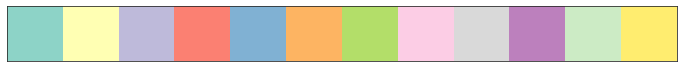

In [32]:
colors = sns.color_palette("Set3")
sns.palplot(colors)
plt.show()

In [33]:
# Establish dataframe
Fdb = WSdb.copy()
Fdb['name'] = Fdb['sample'].map(Mdb.set_index('sample')['name'].to_dict())

ALL_snps = set((x[0], x[2]) for x in set.union(*ISdb['SNP_IDs'].tolist()) if x[2] != 'NA')
CA_snps = set((x[0], x[2]) for x in set.union(*ISdb[ISdb['division'] == 'California']['SNP_IDs'].tolist()) if x[2] != 'NA')

Fdb['class'] = 'Wastewater only'
Fdb['class'] = ['Detected Globally' if snp in ALL_snps else cl for snp, cl in zip(Fdb['key'], Fdb['class'])]
Fdb['class'] = ['Detected in CA' if snp in CA_snps else cl for snp, cl in zip(Fdb['key'], Fdb['class'])]

class2color = {'Wastewater only':colors[0], 'Detected Globally':colors[2], 'Detected in CA':colors[3]}

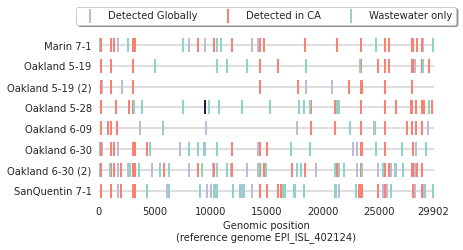

In [34]:
GENOME_LENGTH = 29902

# Establish subplots
sns.set_style('white')
rows = len(WSdb['sample'].unique())
fig, axs = plt.subplots(
    rows, 1, figsize=(6, 3), sharex=True)#, gridspec_kw={"height_ratios": [4, 2, 2]}

# Plot
i = 0
#for sample, db in itertools.chain(Fdb.groupby('name'), zip(['All samples'], [WSdb])):
for sample, db in Fdb.groupby('name'):
    ax = axs[i]
    
    for cl, cdb in db.groupby('class'):
        ax.scatter(cdb['position'], [1]*len(cdb), c=[class2color[cl]], edgecolors='black', s=200, marker='|',
                  alpha=1, lw=2, label=cl)
    
    
    ax.axhline(1, xmin=0, xmax=1, c='lightgrey', zorder=-1)
    ax.set_yticks([1])
    ax.set_yticklabels([sample])
    
    i += 1
    
# remove borders
for axes in axs:
    plt.setp(axes.spines.values(), visible=False)
    
# Re-do xticks
plt.xticks(np.concatenate([np.arange(0, 300001, 5000),[GENOME_LENGTH]]))
plt.xlim(0, GENOME_LENGTH)
    
# Labels
plt.xlabel("Genomic position\n(reference genome EPI_ISL_402124)")
l = axs[0].legend(loc="upper center", bbox_to_anchor=(0.5, 3),fancybox=True, shadow=True, ncol=3)
l.set_zorder(20)

plt.gcf().savefig(fig_loc + 'Figure2c_v1.pdf', bbox_inches='tight')
plt.show()